<a href="https://colab.research.google.com/github/piyushsrivastav/imageprocessing/blob/main/yolov5_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing and Importing Dependencies
- installing pytorch and related dependancies as in documentation

In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


## Refering to Yolo-V5 documentation for loading model- https://github.com/ultralytics/yolov5
Install

Clone repo and install requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.

In [ ]:

!cd yolov5 & pip install -r requirements.txt  

Cloning into 'yolov5'...
Updating files:  81% (118/144)
Updating files:  82% (119/144)
Updating files:  83% (120/144)
Updating files:  84% (121/144)
Updating files:  85% (123/144)
Updating files:  86% (124/144)
Updating files:  87% (126/144)
Updating files:  88% (127/144)
Updating files:  89% (129/144)
Updating files:  90% (130/144)
Updating files:  91% (132/144)
Updating files:  92% (133/144)
Updating files:  93% (134/144)
Updating files:  94% (136/144)
Updating files:  95% (137/144)
Updating files:  96% (139/144)
Updating files:  97% (140/144)
Updating files:  98% (142/144)
Updating files:  99% (143/144)
Updating files: 100% (144/144)
Updating files: 100% (144/144), done.


  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.59.0
    Uninstalling tqdm-4.59.0:
      Successfully uninstalled tqdm-4.59.0


In [ ]:
!git clone https://github.com/ultralytics/yolov5  

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
import torch #to load YOLO  model and make detections
from matplotlib import pyplot as plt # visualise imgs
import numpy as np # array trasnformations
import cv2 # To access webcam and render feeds

## Downloading Pretrained YOLO V5 model from Torchhub
- using yolov5s for computation

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

C:\Users\admin\anaconda3\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\admin/.cache\torch\hub\master.zip
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\admin\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun c

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## We can see the whole set of layers in YoloV5 being used herre

In [ ]:
#Architecure
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img = 'taj.jpg' # string dtype

In [ ]:
results = model(img)
results.print()

image 1/1: 3000x4000 8 persons
Speed: 2522.4ms pre-process, 1930.9ms inference, 12.3ms NMS per image at shape (1, 3, 480, 640)


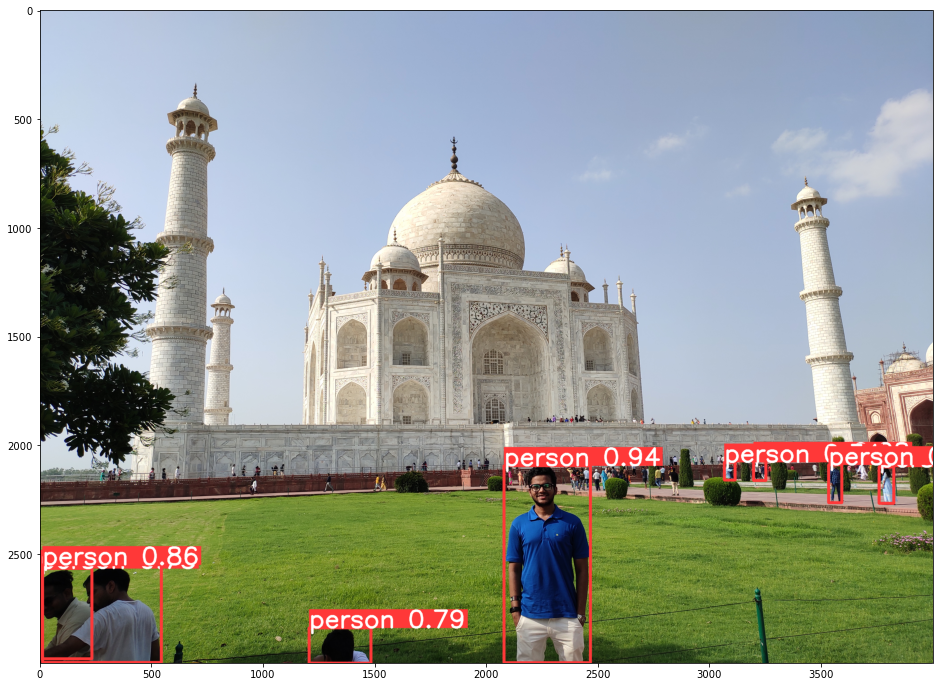

In [ ]:
%matplotlib inline 
plt.figure(figsize = (16,12))
#plt.imshow(random.rand(8, 90), interpolation='nearest')
plt.imshow(np.squeeze(results.render()),aspect='auto') # render img
plt.show()

In [ ]:
np.array(results.render()).shape

(1, 3000, 4000, 3)

### Squeezing the img 

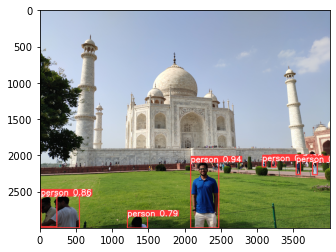

In [ ]:
plt.imshow(np.squeeze(results.render()))

## Trying with another image

In [ ]:
img2 = 'https://static01.nyt.com/images/2010/10/10/us/10google2/10google2-jumbo.jpg?quality=75&auto=webp'

In [ ]:
results = model(img2)
results.print()

image 1/1: 681x1024 1 person, 13 cars, 5 trucks
Speed: 518.6ms pre-process, 2702.3ms inference, 39.1ms NMS per image at shape (1, 3, 448, 640)


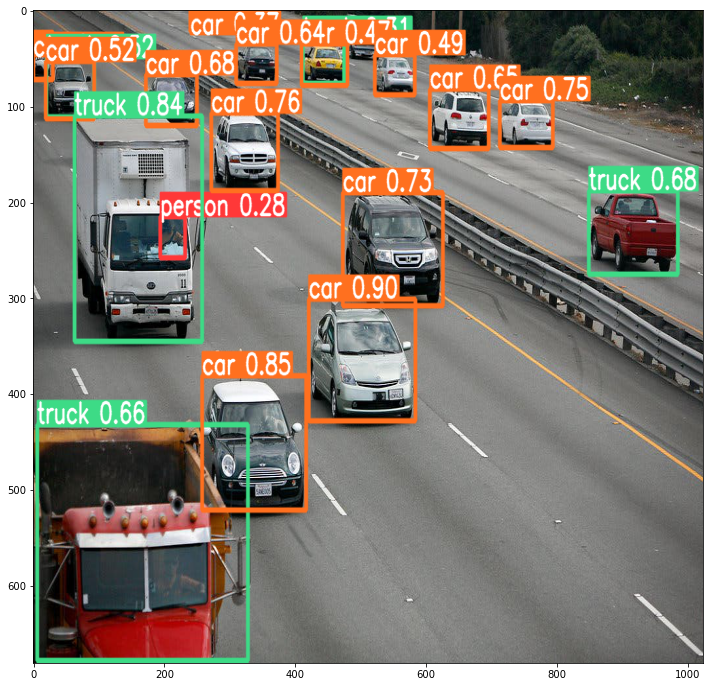

In [ ]:
%matplotlib inline 
plt.figure(figsize = (12,12))
#plt.imshow(random.rand(8, 90), interpolation='nearest')
plt.imshow(np.squeeze(results.render()),aspect='auto')
plt.show()

## 3. Using Video Detection using OpenCV

In [ ]:
cap = cv2.VideoCapture('mrbean.avi')
while cap.isOpened():
    ret, frame = cap.read() # reading capture to get return value & frame of video
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('yolo', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 4. Training from my dataset

In [ ]:
import uuid   # Unique identifier
import os
import time # to take break between every capture

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('img collection',frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
Updating files:  41% (49/117)
Updating files:  42% (50/117)
Updating files:  43% (51/117)
Updating files:  44% (52/117)
Updating files:  45% (53/117)
Updating files:  46% (54/117)
Updating files:  47% (55/117)
Updating files:  48% (57/117)
Updating files:  49% (58/117)
Updating files:  50% (59/117)
Updating files:  51% (60/117)
Updating files:  52% (61/117)
Updating files:  53% (63/117)
Updating files:  54% (64/117)
Updating files:  55% (65/117)
Updating files:  56% (66/117)
Updating files:  57% (67/117)
Updating files:  58% (68/117)
Updating files:  59% (70/117)
Updating files:  60% (71/117)
Updating files:  61% (72/117)
Updating files:  62% (73/117)
Updating files:  63% (74/117)
Updating files:  64% (75/117)
Updating files:  65% (77/117)
Updating files:  66% (78/117)
Updating files:  67% (79/117)
Updating files:  68% (80/117)
Updating files:  69% (81/117)
Updating files:  70% (82/117)
Updating files:  71% (84/117)
Updating files:  72% (85/117)
Updating file

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


Updating files:  83% (98/117)
Updating files:  84% (99/117)
Updating files:  85% (100/117)
Updating files:  86% (101/117)
Updating files:  87% (102/117)
Updating files:  88% (103/117)
Updating files:  89% (105/117)
Updating files:  90% (106/117)
Updating files:  91% (107/117)
Updating files:  92% (108/117)
Updating files:  93% (109/117)
Updating files:  94% (110/117)
Updating files:  95% (112/117)
Updating files:  96% (113/117)
Updating files:  97% (114/117)
Updating files:  98% (115/117)
Updating files:  99% (116/117)
Updating files: 100% (117/117)
Updating files: 100% (117/117), done.


  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:
      Successfully uninstalled lxml-4.6.3


## At this stage we made our custom label using Label IMG

### Continued- https://colab.research.google.com/drive/1bTH1VCgMcKiONi9A_NRHtKelb-CPbkCa#scrollTo=abIiwDu6x5CY

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 90 --data dataset.yml --weights yolov5s.pt --workers 2

^C


## Loading custom model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\admin/.cache\torch\hub\master.zip
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per C:\Users\admin\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-12-2 Python-3.8.8 torch-1.13.0+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Lets Test !!

In [ ]:
img=os.path.join('data','images','drowsy.52dc197e-7196-11ed-a912-b914511f8c7e.jpg')

In [ ]:
results=model(img)
results.print()

image 1/1: 480x640 (no detections)
Speed: 119.6ms pre-process, 2331.5ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


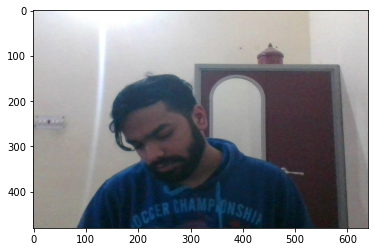

In [ ]:
%matplotlib inline 
# plt.figure(figsize = (12,12))
#plt.imshow(random.rand(8, 90), interpolation='nearest')
plt.imshow(np.squeeze(results.render()),aspect='auto')
plt.show()